In [ ]:
import pandas as pd
import numpy as np 
import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'
df = pd.read_csv(url, error_bad_lines=False)




/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [ ]:
df.shape


(2035, 8)

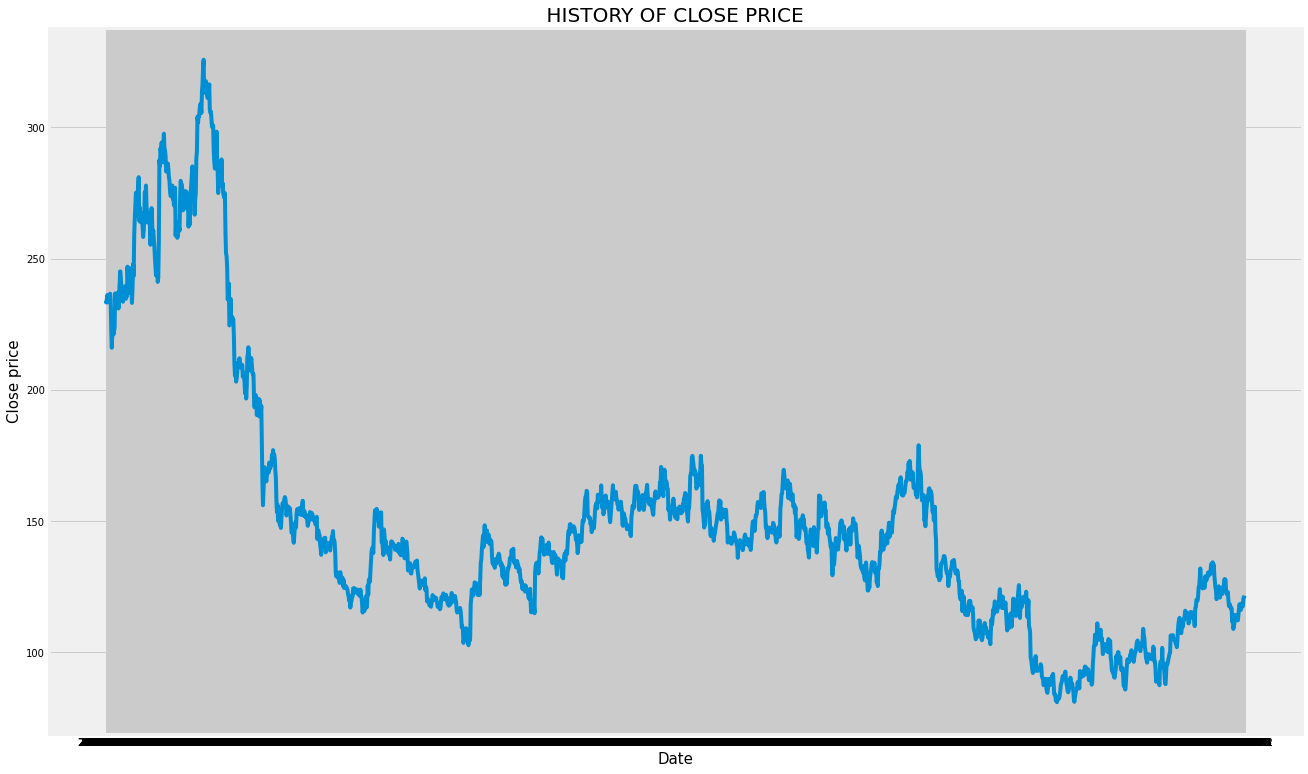

In [ ]:
plt.figure(figsize=(20,13))
plt.title(' HISTORY OF CLOSE PRICE ',fontsize=20)
plt.plot(df['Date'], df['Close'])
plt.xlabel('Date',fontsize=15)
plt.ylabel('Close price',fontsize=15)
plt.show()

In [ ]:

#Creating a dataframe using Close column
data=df.filter(['Close'])
#coverting dataframe into numpy array
dataset=data.values
#allocating data for training the data
train_data_len=math.ceil(len(dataset)*.8)
train_data_len


1628

In [ ]:
#scaling the data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

In [ ]:
#creating traning dataset
train_data=scaled_data[0:train_data_len,:]
#splitting into x_train and y_train
x_train=[]
y_train=[]
for i in range (60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=60:
    print(x_train)
    print(y_train)
    


[array([0.62418301, 0.62214052, 0.62622549, 0.63378268, 0.62234477,
       0.62765523, 0.62888072, 0.62949346, 0.63582516, 0.625     ,
       0.57883987, 0.55167484, 0.57618464, 0.58006536, 0.57230392,
       0.57781863, 0.58312908, 0.63623366, 0.62642974, 0.63337418,
       0.62745098, 0.62254902, 0.6376634 , 0.61294935, 0.63112745,
       0.65196078, 0.67075163, 0.66196895, 0.64705882, 0.63970588,
       0.62745098, 0.62336601, 0.63868464, 0.63480392, 0.63991013,
       0.64767157, 0.62785948, 0.63112745, 0.63194444, 0.67790033,
       0.65870098, 0.65890523, 0.64603758, 0.63705065, 0.67544935,
       0.66319444, 0.6439951 , 0.62152778, 0.64419935, 0.68198529,
       0.6629902 , 0.72691993, 0.75265523, 0.77144608, 0.79166667,
       0.79370915, 0.75714869, 0.77736928, 0.80208333, 0.81719771])]
[0.7495915032679739]


In [ ]:
#converting x_train and y_train into numpy arrays
x_train,y_train=np.array(x_train),np.array(y_train)

In [ ]:
#reshape the data
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1568, 60, 1)

In [ ]:
#build the lstm
model= Sequential()
model.add(LSTM(50,return_sequences=True , input_shape= (x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [ ]:
#compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
model.fit(x_train,y_train,batch_size=1,epochs=1)

1568/1568 [==============================] - 45s 25ms/step - loss: 0.0019


In [ ]:
test_data=scaled_data[train_data_len-60: ,:]
#create test datasets
x_test=[]
y_test=dataset[train_data_len:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])
  

In [ ]:
#convert the data into numpy array
x_test=np.array(x_test)
#reshape the data
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [38]:
#predict the price values
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)


In [ ]:
#root mean squared error(rmse)
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

0.35384494865848615

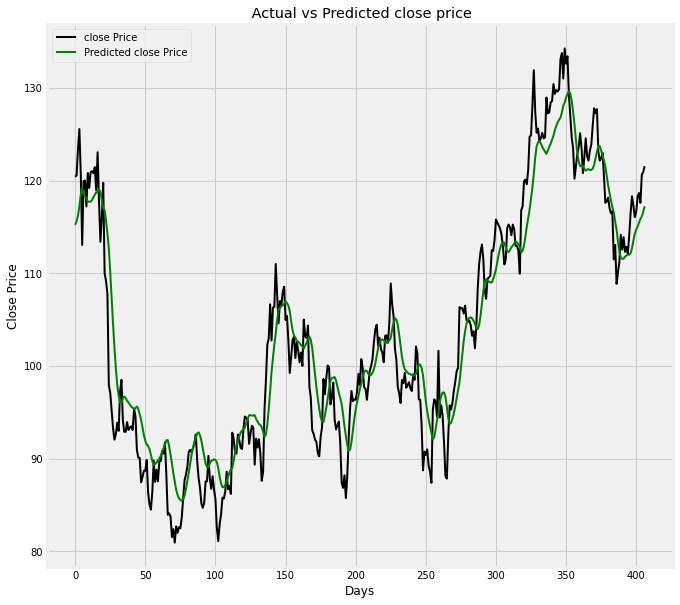

In [58]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.plot(y_test, color = 'black', label = 'close Price',linewidth=2)
plt.plot(predictions, color = 'green', label = 'Predicted close Price',linewidth=2)
plt.title(' Actual vs Predicted close price')
plt.xlabel('Days')
plt.ylabel('Close Price')

plt.legend()
plt.show()